#  import libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Read CSV

In [5]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/jeussej/LOL_proyect/master/init.py
import init; init.init(force_download=False);
df = pd.read_csv("local/data/lol_ranked_games.csv")

Get first aproximation

In [ ]:
X=df.copy()
Y=X["hasWon"]
X.drop("hasWon",axis=1, inplace=True)

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.4, shuffle=True)


In [ ]:
def train_test_accuracy(x_train,x_test,y_train,y_test):
#     """this function prints the accuracy in train and test using logistic regression
#         Inputs  x_train: dataset for train
#                 x_test: dataset for test
#                 y_train: answer for train
#                 y_test: answer for test
#         """"
                

    regressor = LogisticRegression(C=1,fit_intercept=True)
    regressor.fit(x_train, y_train)
    y_test_pred = regressor.predict(x_test)
    y_train_pred=regressor.predict(x_train)
    LR_train_error=accuracy_score(y_train, y_train_pred)
    LR_test_error = accuracy_score(y_test, y_test_pred)
    
    
    print(f'Train accuracy: {LR_train_error}')
    print(f'Test accuracy: {LR_test_error}')
    
    return LR_train_error, LR_test_error
    

In [ ]:
first_iteration_train_error, first_iteration_test_error=train_test_accuracy(x_train,x_test,y_train,y_test)

Train accuracy: 0.5113265495420597
Test accuracy: 0.5126199383689413


# Explore Dataset

check if there is any null value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242572 entries, 0 to 242571
Data columns (total 59 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gameId                   242572 non-null  int64  
 1   gameDuration             242572 non-null  int64  
 2   hasWon                   242572 non-null  int64  
 3   frame                    242572 non-null  int64  
 4   goldDiff                 242572 non-null  int64  
 5   expDiff                  242572 non-null  int64  
 6   champLevelDiff           242572 non-null  float64
 7   isFirstTower             242572 non-null  int64  
 8   isFirstBlood             242572 non-null  int64  
 9   killedFireDrake          242572 non-null  int64  
 10  killedWaterDrake         242572 non-null  int64  
 11  killedAirDrake           242572 non-null  int64  
 12  killedEarthDrake         242572 non-null  int64  
 13  killedElderDrake         242572 non-null  int64  
 14  lost

Show all collumns and check if there is outlayers or columns without relevant information

In [ ]:
df.describe().iloc[:,:20]

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,killedWaterDrake,killedAirDrake,killedEarthDrake,killedElderDrake,lostFireDrake,lostWaterDrake,lostAirDrake,lostEarthDrake,lostElderDrake,killedBaronNashor
count,2.425720e+05,2.425720e+05,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000
mean,4.501480e+09,1.785494e+06,0.498128,19.811264,-11.413811,-215.019351,-0.026517,0.617709,0.998627,0.295908,0.300241,0.301943,0.303609,0.005545,0.308539,0.313899,0.315135,0.319794,0.005714,0.141274
std,5.331693e+07,3.761901e+05,0.499998,7.197339,5438.051920,5261.880802,0.772366,0.485948,0.037026,0.509759,0.515638,0.515935,0.519595,0.078099,0.518721,0.523259,0.524350,0.531450,0.079161,0.388436
min,4.357970e+09,5.490000e+05,0.000000,10.000000,-21578.000000,-32484.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.463051e+09,1.532000e+06,0.000000,14.000000,-3420.250000,-3148.000000,-0.600000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.529395e+09,1.774000e+06,0.000000,18.000000,24.000000,-123.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.543718e+09,2.025000e+06,1.000000,24.000000,3409.000000,2772.000000,0.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,4.547671e+09,3.428000e+06,1.000000,56.000000,23432.000000,43304.000000,3.800000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000


In the first 20 columns we dont have any rare value but the gameId column has not relevant information. We can eliminate it

In [ ]:
df.describe().iloc[:,20:40]

,lostBaronNashor,killedRiftHerald,lostRiftHerald,destroyedTopInhibitor,destroyedMidInhibitor,destroyedBotInhibitor,lostTopInhibitor,lostMidInhibitor,lostBotInhibitor,destroyedTopNexusTurret,destroyedMidNexusTurret,destroyedBotNexusTurret,lostTopNexusTurret,lostMidNexusTurret,lostBotNexusTurret,destroyedTopBaseTurret,destroyedMidBaseTurret,destroyedBotBaseTurret,lostTopBaseTurret,lostMidBaseTurret
count,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.0,242572.0,242572.000000,242572.0,242572.0
mean,0.158316,0.564319,0.617380,0.021977,0.030045,0.087689,0.021960,0.030354,0.081419,0.032184,0.038747,0.101656,0.030424,0.037828,0.093185,0.0,0.0,0.052005,0.0,0.0
std,0.412581,0.665504,0.693911,0.154788,0.179837,0.313325,0.154497,0.180825,0.298613,0.176490,0.192992,0.302197,0.171751,0.190780,0.290692,0.0,0.0,0.284509,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
max,4.000000,2.000000,2.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,2.000000,0.0,0.0


The columns destroyedTopBaseTurret, destroyedMidBaseTurret, lostTopBaseTurret, lostMidBaseTurret have 0 ass value in all rows, we can eliminate them

In [ ]:
df.describe().iloc[:,40:]

,lostBotBaseTurret,destroyedTopInnerTurret,destroyedMidInnerTurret,destroyedBotInnerTurret,lostTopInnerTurret,lostMidInnerTurret,lostBotInnerTurret,destroyedTopOuterTurret,destroyedMidOuterTurret,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
count,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000
mean,0.051003,0.120624,0.117305,0.193027,0.110998,0.117553,0.179229,0.379487,0.381870,0.369997,0.376795,0.368822,0.355243,16.391381,16.342220,21.166029,56.833530,10.487031,10.263077
std,0.283813,0.325690,0.321784,0.394675,0.314130,0.322078,0.383545,0.485260,0.485846,0.482805,0.484584,0.482487,0.478588,9.660237,9.697602,16.055645,58.734777,8.713549,8.736323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,9.000000,9.000000,25.000000,4.000000,4.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,15.000000,17.000000,40.000000,8.000000,8.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.000000,22.000000,30.000000,63.000000,15.000000,14.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,69.000000,72.000000,137.000000,1014.000000,115.000000,107.000000


wardsPlaced	wardsDestroyed	wardsLost has weird values in max values. We are going to plot it to see if there is any outlayer that we can remove

Text(0.5, 1.0, 'wardsLost')

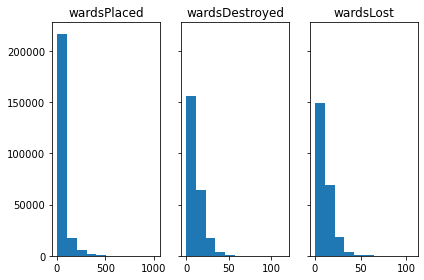

In [ ]:
fig, (wardsPlaced,wardsDestroyed,wardsLost) = plt.subplots(1, 3, sharey=True, tight_layout=True)
wardsPlaced.hist(df["wardsPlaced"])
wardsPlaced.set_title("wardsPlaced")
wardsDestroyed.hist(df["wardsDestroyed"])
wardsDestroyed.set_title("wardsDestroyed")
wardsLost.hist(df["wardsLost"])
wardsLost.set_title("wardsLost")

lets check values in Wards placed>500 in wardsDestroyed>60 and in WardsLost>60 because them look like outlayers

In [ ]:
WP=len(df[df["wardsPlaced"]>=500])*100/len(df)
WD=len(df[df["wardsDestroyed"]>=60])*100/len(df)
WL=len(df[df["wardsLost"]>=60])*100/len(df)


print(f" of values bigger than 500 in column wardsPlaced {WP}")
print(f" of values bigger than 60 in column wardsDestroyed {WD}")
print(f" of values bigger than 60 in column wardsLost {WL}")

 of values bigger than 500 in column wardsPlaced 0.12243787411572646
 of values bigger than 60 in column wardsDestroyed 0.1418135646323566
 of values bigger than 60 in column wardsLost 0.17932819946242765


# Cleaning Dataset

In [ ]:
df=df[df["wardsPlaced"]<500]
df=df[df["wardsDestroyed"]<60]
df=df[df["wardsLost"]<60]
len(df)

241509

# Preprocessing

In [ ]:
#We are going to delete the columns that dont have relevant information
#we are going to add how many dragons a team has because this information is important

def preprocessing(dataframe):
    new_df=dataframe.copy()
    
    #delet columns
    columns=["gameId","destroyedTopBaseTurret", "destroyedMidBaseTurret", "lostTopBaseTurret", "lostMidBaseTurret"]
    for i in columns:        
        new_df.pop(i)
        
    #add total dragons column   
    new_df["totalDragonsKilled"]=df["killedFireDrake"]+df["killedWaterDrake"]+df["killedAirDrake"]+df["killedEarthDrake"]
    new_df["totalDragonslost"]=df["lostFireDrake"]+df["lostWaterDrake"]+df["lostAirDrake"]+df["lostEarthDrake"]
    
    
    #Standar scaller 
    import pandas as pd
    from sklearn import preprocessing
    
    #find split dataset in categorical and non categorical
    categorical=pd.DataFrame()
    non_categorical=pd.DataFrame()
    for i in df.columns:
        unique=set(new_df[i])
        if unique==set([0,1]):
            categorical[i]=new_df[i].copy()
        else:
            non_categorical[i]=new_df[i].copy()
            
#     min_max_scaler = preprocessing.MinMaxScaler()
#     non_categorical_scaled = min_max_scaler.fit_transform(non_categorical)
    new_df = categorical+non_categorical_scaled
    
    
        
    return new_df
    

In [ ]:
X=preprocessing(df)
Y=X["hasWon"]
X.drop("hasWon",axis=1, inplace=True)

x_train, x_trans, y_train, y_trans = train_test_split(X,Y, test_size=0.4, shuffle=True)
x_test, x_val, y_test, y_val = train_test_split(x_trans,y_trans, test_size=0.33, shuffle=False)

KeyError: 'gameId'

In [ ]:
df

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,...,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
0,4546233126,1443000,1,10,-448,-147,-0.2,0,1,0,...,0,0,0,0,4,7,5,21,3,5
1,4546233126,1443000,1,12,-1306,-925,-0.6,0,1,0,...,0,0,0,0,6,11,6,28,4,6
2,4546233126,1443000,1,14,2115,2578,0.4,1,1,0,...,0,0,0,0,10,11,12,35,4,6
3,4546233126,1443000,1,16,1195,2134,0.4,1,1,0,...,0,0,1,0,10,12,12,45,6,10
4,4546233126,1443000,1,18,2931,4382,0.6,1,1,1,...,0,0,1,0,13,13,16,49,7,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242567,4402156483,1774000,0,30,-8523,-13498,-1.6,1,1,1,...,0,0,1,1,33,41,50,80,18,17
242568,4379826739,1013000,0,10,-271,-1243,-0.2,0,1,0,...,0,0,0,0,6,5,6,18,1,2
242569,4379826739,1013000,0,12,-2013,-3493,-0.8,0,1,0,...,0,0,0,0,7,8,6,23,1,5
242570,4379826739,1013000,0,14,-2388,-4543,-0.8,0,1,0,...,0,0,0,0,10,13,9,27,5,6


In [ ]:
preproccesing_train_error, preproccesing_test_error=train_test_accuracy(x_train,x_test,y_train,y_test)

Train accuracy: 0.5020028445201762
Test accuracy: 0.501674757031403


In [ ]:
print(f"train accuracy increase by preprocessing {preproccesing_train_error-first_iteration_train_error}")
print(f"test accuracy increase by preprocessing {preproccesing_test_error-first_iteration_test_error}")



train accuracy increase by preprocessing 0.0
test accuracy increase by preprocessing 0.0


# Model selection

In [ ]:
logistic regression
decision tree 
from sklearn.tree import DecisionTreeClassifier
svc
from sklearn.svm import SVC
k-nearest neigbors
from sklearn.neighbors import KNeighborsClassifier
ensambles
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
gausian nb
from sklearn.naive_bayes import GaussianNB

In [ ]:
df.columns

Index(['gameId', 'gameDuration', 'hasWon', 'frame', 'goldDiff', 'expDiff',
       'champLevelDiff', 'isFirstTower', 'isFirstBlood', 'killedFireDrake',
       'killedWaterDrake', 'killedAirDrake', 'killedEarthDrake',
       'killedElderDrake', 'lostFireDrake', 'lostWaterDrake', 'lostAirDrake',
       'lostEarthDrake', 'lostElderDrake', 'killedBaronNashor',
       'lostBaronNashor', 'killedRiftHerald', 'lostRiftHerald',
       'destroyedTopInhibitor', 'destroyedMidInhibitor',
       'destroyedBotInhibitor', 'lostTopInhibitor', 'lostMidInhibitor',
       'lostBotInhibitor', 'destroyedTopNexusTurret',
       'destroyedMidNexusTurret', 'destroyedBotNexusTurret',
       'lostTopNexusTurret', 'lostMidNexusTurret', 'lostBotNexusTurret',
       'destroyedTopBaseTurret', 'destroyedMidBaseTurret',
       'destroyedBotBaseTurret', 'lostTopBaseTurret', 'lostMidBaseTurret',
       'lostBotBaseTurret', 'destroyedTopInnerTurret',
       'destroyedMidInnerTurret', 'destroyedBotInnerTurret',
       'los

In [ ]:
import pandas as pd
from sklearn import preprocessing

#find split dataset in categorical and non categorical
categorical=pd.DataFrame()
non_categorical=pd.DataFrame()
for i in df.columns:
    unique=set(df[i])
    if unique==set([0,1]):
        categorical[i]=df[i].copy()
    else:
        non_categorical[i]=df[i].copy()
        
    min_max_scaler = preprocessing.MinMaxScaler()
    non_categorical_scaled = min_max_scaler.fit_transform(non_categorical)
    non_categorical_scaled
#     new_df = pd.concat([categorical, non_categorical_scaled], axis=1, sort=False)


In [ ]:
non_categorical_scaled

array([[0.9924177 , 0.31052449, 0.        , ..., 0.03629032, 0.05084746,
        0.08474576],
       [0.9924177 , 0.31052449, 0.04347826, ..., 0.05040323, 0.06779661,
        0.10169492],
       [0.9924177 , 0.31052449, 0.08695652, ..., 0.06451613, 0.06779661,
        0.10169492],
       ...,
       [0.11521508, 0.16116707, 0.04347826, ..., 0.04032258, 0.01694915,
        0.08474576],
       [0.11521508, 0.16116707, 0.08695652, ..., 0.0483871 , 0.08474576,
        0.10169492],
       [0.11521508, 0.16116707, 0.13043478, ..., 0.05645161, 0.10169492,
        0.16949153]])